In [64]:
import pandas as pd
import matplotlib.pyplot as plt

import scipy 
from scipy.stats import spearmanr

from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import scale
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

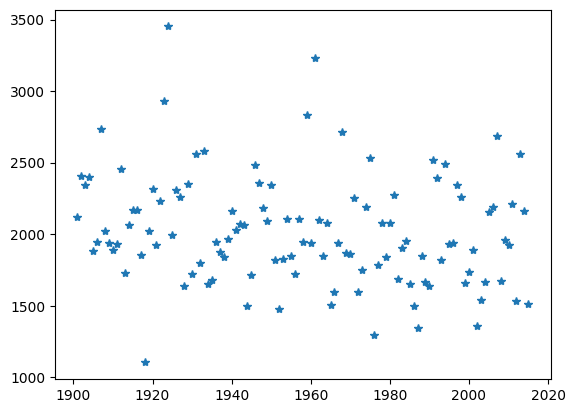

In [65]:
import numpy as np
x=pd.read_csv(r"C:\techslingers\kerala.csv")
y=pd.read_csv(r"C:\techslingers\kerala.csv")

y1=list(x["YEAR"])
x1=list(x["Jun-Sep"])
z1=list(x["JUN"])
w1=list(x["MAY"])

plt.plot(y1, x1,'*')
plt.show()

In [80]:
flood=[]
june=[]
sub=[]

'''
CREATING A NEW COLOUMN WITH BINARY CLASSIFICATION DEPENDING IF THAT YEAR 
HAD FLOODED OR NOT USING RAINFALL OF THAT YEAR AS THRESHOLD
'''
for i in range(0,len(x1)):
    if x1[i]>2400:
        flood.append('1')
    else:
        flood.append('0')


'''
APPROXIMATELY FINDING THE RAINFALL DATA FOR 10 DAYS 
FOR THE MONTH OF JUNE IN EVERY YEAR FROM 1901 TO 2015
'''
for k in range(0,len(x1)):
    june.append(z1[k]/3)

'''
FINDING THE INCREASE IN RAINFALL 
FROM THE MONTH OF MAY TO THE MONTH OF JUNE IN EVERY YEAR FROM 1901 TO 2015
'''


for k in range(0,len(x1)):
    average = (w1[k]+z1[k])/2
    difference = abs(w1[k]-z1[k])
    sub.append((difference / average) * 100)


df = pd.DataFrame({'flood':flood})
df1=pd.DataFrame({'per_10_days':june})

x["flood"]=flood
x["avgjune"]=june
x["sub"]=sub

#SAVING THE NEW CSV FILE WITH THE NEW COLOUMNS
x.to_csv("out1.csv")
print((x))


    SUBDIVISION  YEAR   JAN   FEB   MAR    APR    MAY     JUN     JUL    AUG   
0        KERALA  1901  28.7  44.7  51.6  160.0  174.7   824.6   743.0  357.5  \
1        KERALA  1902   6.7   2.6  57.3   83.9  134.5   390.9  1205.0  315.8   
2        KERALA  1903   3.2  18.6   3.1   83.6  249.7   558.6  1022.5  420.2   
3        KERALA  1904  23.7   3.0  32.2   71.5  235.7  1098.2   725.5  351.8   
4        KERALA  1905   1.2  22.3   9.4  105.9  263.3   850.2   520.5  293.6   
..          ...   ...   ...   ...   ...    ...    ...     ...     ...    ...   
110      KERALA  2011  20.5  45.7  24.1  165.2  124.2   788.5   536.8  492.7   
111      KERALA  2012   7.4  11.0  21.0  171.1   95.3   430.3   362.6  501.6   
112      KERALA  2013   3.9  40.1  49.9   49.3  119.3  1042.7   830.2  369.7   
113      KERALA  2014   4.6  10.3  17.9   95.7  251.0   454.4   677.8  733.9   
114      KERALA  2015   3.1   5.8  50.1  214.1  201.8   563.6   406.0  252.2   

     ...    NOV    DEC  ANNUAL  Jan-Feb

In [67]:

'''
LOGISTIC REGRESSION USED FOR BINARY CLASSIFICATION TRAINING

TAKING THE COLOUMNS WHICH ARE TO USED FOR TRAINING THE MODEL
Input:
16 MAR-MAY
20- AVG OF 10 DAYS JUNE 
21- DIFFERENCE OF RAINFALL FROM MAY TO JUNE

Output Prediction:
19 - BINARY CLASS OF FLOOD- 0 OR 1
MORE DATA CAN BE ADDED FOR TRAINING BY ADDING MORE COLUMNS TO CSV FILE
'''

X = x.iloc[:,[16,20,21]].values
y1=x.iloc[:,19].values

(X_train, X_test, Y_train, Y_test) = train_test_split(X, y1, random_state=0)

Lr=LogisticRegression()

Lr.fit(X,y1)
print(Lr.score(X,y1))  # PRINTS THE ACCURACY





0.8608695652173913


In [68]:
#data training input columns:
# present years march to may rainfall data on average
#average rainfall in past 10 days of june
#average inscrease in rainfall from may to june 

#live input from
#https://wris.kerala.gov.in/mis/wd/home/rainfall-actual;component=rainfall-actual;src=Kerala%20SW;srcUUID=d1618007-77ea-11ea-9f4b-000d3a320689;srcName=Kerala%20SW;pType=STATE;cType=DISTRICT;locName=Kerala;locUUID=b3a3109c-1d8d-11ea-9f34-04ea56f9ded6;sDate=20240601;eDate=20240722;cumStartYear=1969;cumEndYear=2024;view=ADMIN;isFilter=true;mapOnClickParams=false;minDate=19690809;maxDate=20240722
#average rainfall over long period (normal)
#average rainfall over specific period (actual)
#average increase in rainfall (deviation)



    


In [69]:
import requests
from bs4 import BeautifulSoup


In [73]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.chrome.options import Options
from webdriver_manager.chrome import ChromeDriverManager
from bs4 import BeautifulSoup

chrome_options = Options()
chrome_options.add_argument("--headless") 
driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()), options=chrome_options)

url = 'https://wris.kerala.gov.in/gis/rainfall;components=rainfall;srcName=IMD%20GRID;srcUUID=3d712275-a413-11ea-81b1-000d3a320689;minDate=19880701;maxDate=20240722;cType=PANCHAYATH;locname=Trithala;loctype=MANDAL;locuuid=0293e3f6-1f7d-4fef-84fa-45b159c47453;mapOnClickParams=true;component=rainfall;view=ADMIN;src=IMD%20GRID;type=ACTUAL;aggr=SUM;format=yyyyMMdd;ytd=2024;sDate=20240601;eDate=20240722;infotabOnClick=true'
driver.get(url)

import time
time.sleep(5)  

html = driver.page_source

soup = BeautifulSoup(html, 'html.parser')

text = soup.get_text(separator='\n', strip=True)

summary_index = text.find("Summary")

if summary_index != -1:
    summary_section = text[summary_index:]
    
    lines = summary_section.split('\n')
    
    actual_str = lines[1].strip()
    normal_str = lines[2].strip()
    deviation_str = lines[3].strip()
    
    actual = float(actual_str)
    normal = float(normal_str)
    deviation = float(deviation_str)
    
    print(f"Actual: {actual}")
    print(f"Normal: {normal}")
    print(f"Deviation: {deviation}")

driver.quit()



Actual: 941.4
Normal: 725.6
Deviation: 29.7


In [74]:
l=[[normal,actual,deviation]]

f1=Lr.predict(l)

for i in range(len(f1)):

    if (int(f1[i])==1):
        print(f1[i],"- possibility of  severe flood")
    else:
        print(f1[i],"- no chance of severe flood")

1 - possibility of  severe flood


In [15]:
import openrouteservice as ors
import folium
import operator
from functools import reduce
import math


In [16]:
client = ors.Client(key='5b3ce3597851110001cf624876a2839afd6741a7992073ce7a614c8e')

In [60]:
def calculate_distance(coord1, coord2):
    return math.sqrt((coord1[0] - coord2[0])**2 + (coord1[1] - coord2[1])**2)

user_coords = [10.999999999, 76.9999999999999]
rf_names = ["Kerala State Disaster Management Authority","HelpAge India","Welfare Services Ernakulam","ENNAKKATHARA AYURVEDA HOSPITAL","NEUROBASE BRAIN AND SPINE EXCELLENCE SPECIALITY CENTRE FOR AYURVEDA AND PHYSIOTHERAPY","Kripa Ayurveda Marma Hospital","Ayurmadom Ayurveda Treatment Centre"]
rf_coords = [
    [8.639980372316959, 76.95590935165335],
    [10.119520410385372, 76.29123648841443],
    [9.987917841891562, 76.31416575113498],
    [9.986565361210653, 76.31347910565768],
    [10.024094610996531, 76.32583872424894],
    [9.979802873495828, 76.2437845897126],
    [9.991299018994322, 76.29665629146405]
    
]
print("USER COORDS:",user_coords)
#folium uses lat long format
#ors uses long lat format
user_coords = user_coords[::-1]
for i in range(len(rf_coords)):
    rf_coords[i] = rf_coords[i][::-1]

m = folium.Map(location=list([12.357949812626646, 75.10041316496783]), tiles="cartodbpositron", zoom_start=13)


closest_coords = min(rf_coords, key=lambda coord: calculate_distance(user_coords, coord))

print("The closest coordinate pair is:", closest_coords[::-1])
print("Please go to centre name:",rf_names[rf_coords.index(closest_coords)])
    
coords = [user_coords, closest_coords]

route = client.directions(coordinates=coords,
                          profile='foot-walking',
                          format='geojson')

waypoints = list(dict.fromkeys(reduce(operator.concat, list(map(lambda step: step['way_points'], route['features'][0]['properties']['segments'][0]['steps'])))))

folium.PolyLine(locations=[list(reversed(coord)) for coord in route['features'][0]['geometry']['coordinates']], color="blue").add_to(m)

m


USER COORDS: [10.999999999, 76.9999999999999]
The closest coordinate pair is: [10.119520410385372, 76.29123648841443]
Please go to centre name: HelpAge India
